
## Linear Regression Analysis ##
**This analysis uses California Housing data obtained from the StatLib repository. The data comprises of features and training data. Linear regression is a popular machine learning algorithm used for predicting continuous outcomes. The relationship between the features and the target variable is explored by splitting the dataset into training and testing sets, train the model, make predictions, and evaluate the model's performance.**



* Data fetching
* Data preprocessing
* Method
* Result
* Discsssi
  
#### California_housing dataset contains two main components:

1. Features or Predictive (data): This part includes various attributes like MedInc (median income), HouseAge, AveRooms (average rooms per household), and more.

2. Target (target): This part is the variable to predict, which in this dataset is the Median House Value in a California district.

The California Housing Data has no missing attributes values.



In [1]:
#importing needed libraries for the analysis

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import math
from sklearn import linear_model
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [2]:
# naming and fetching the fetch_california_housing data
california = fetch_california_housing(as_frame=True)

In [3]:
# description of the data
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
# Confirm the shape of the data
data_shape = california.data.shape
data_shape

(20640, 8)

In [5]:
# Confirm the size of the data
data_size = california.data.size
data_size

165120


#### Converting the data into dataFrame and describing the California Housing Data


In [6]:
# Convert to a pandas DataFrame
# naming the columns; data and california.feature_names 

# Convert to a DataFrame and name the columns
california_df = pd.DataFrame(california.data, columns = california.feature_names)

# Show the first few rows
print(california_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  



#### describing the data, the shape and column


In [7]:
# the shape of the data
print(california_df.shape)

(20640, 8)


In [8]:
# the mean, count, and median of the carlifornia housing data
print(california_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [9]:
print(california_df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')



## MACHINE LEARNING
* Setting the data to a fit a normal scale
* Separate the dataset into Target and Data
* Viewing the california.feature_names values and california.data values

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
california_df[['MedInc', 'HouseAge', 'AveRooms', 'Population']] = scaler.fit_transform(california_df[['MedInc', 'HouseAge', 'AveRooms', 'Population']])


In [31]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [32]:
print(california.data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [33]:
# Separate the dataset into target and data
data = california.data
target = california.target

In [34]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [35]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

#### Adding MedHouseValue as a column (target)

In [36]:
# Add the target column to the dataframe as 'MedHouseValue'
california_df['MedHouseValue'] = pd.Series(target)

In [37]:
# Show the statistical summaries of the dataframe
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000
mean,6.609700e-17,5.508083e-18,6.609700e-17,1.096675,-1.101617e-17,3.070655,35.631861,-119.569704,2.068558
std,1.000024e+00,1.000024e+00,1.000024e+00,0.473911,1.000024e+00,10.386050,2.135952,2.003532,1.153956
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,0.333333,-1.256123e+00,0.692308,32.540000,-124.350000,0.149990
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,1.006079,-5.638089e-01,2.429741,33.930000,-121.800000,1.196000
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,1.048780,-2.291318e-01,2.818116,34.260000,-118.490000,1.797000
75%,4.593063e-01,6.643103e-01,2.519615e-01,1.099526,2.644949e-01,3.282261,37.710000,-118.010000,2.647250
max,5.858286e+00,1.856182e+00,5.516324e+01,34.066667,3.025033e+01,1243.333333,41.950000,-114.310000,5.000010


# Visualizing the data


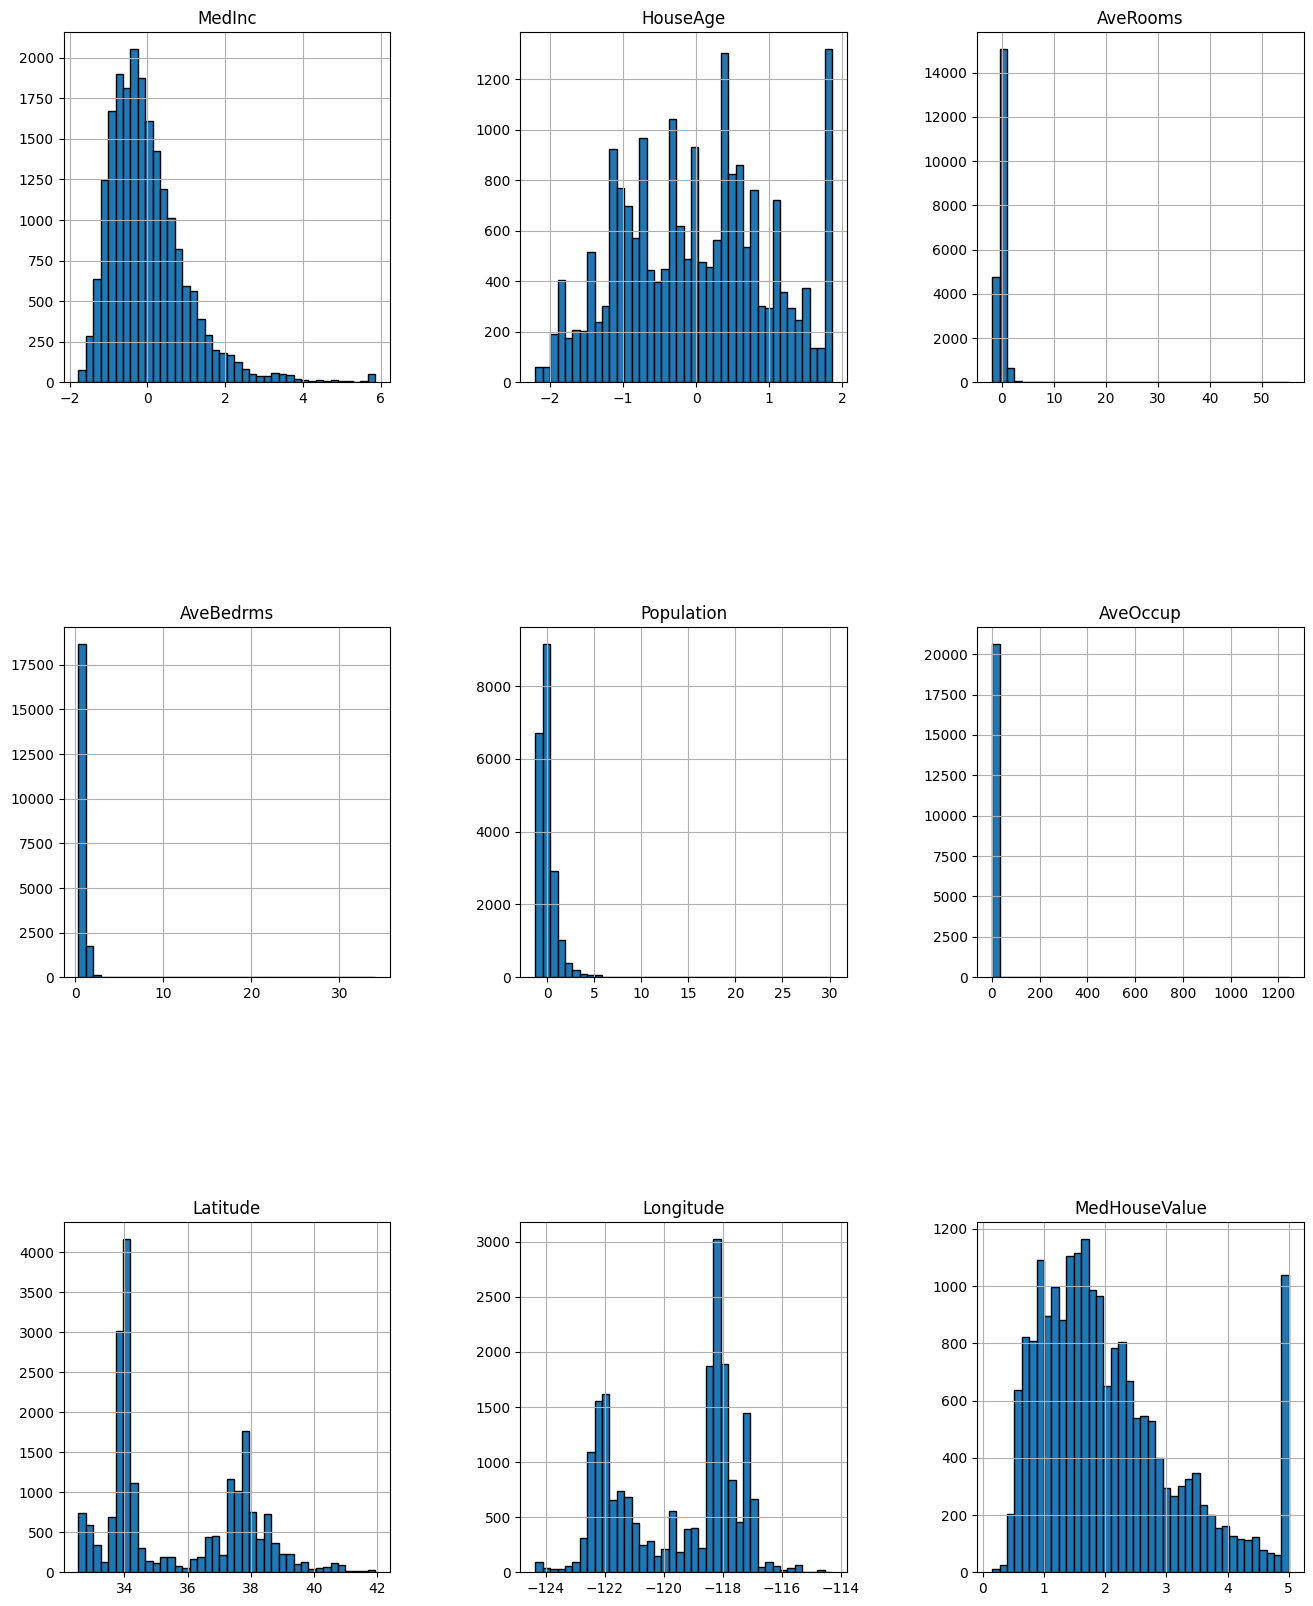

In [38]:
california_df.hist(figsize=(16, 20), bins=40, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: >

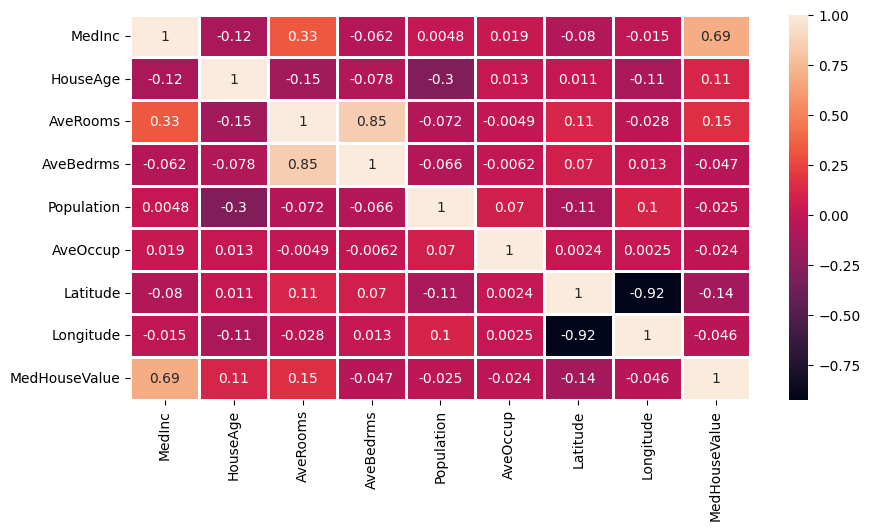

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(california_df.corr(), annot=True,linewidths=2)

**Correlation Heatmap:**
This shows the correlation coefficients between all pairs of variables.

MedInc has a strong positive correlation (0.69) with MedHouseValue, indicating that it is the most significant predictor of housing prices in this dataset. AveRooms is moderately correlated with MedHouseValue (0.15). There are strong correlations between AveRooms and AveBedrms (0.85), indicating that the number of rooms and bedrooms are closely related. Also, there is a strong negative correlation between Latitude and Longitude (-0.92), which suggests a specific geographical trend in the data. Other variables have relatively low correlations with MedHouseValue, meaning they might not contribute as strongly to predicting housing values.


#### PERFORMING LINEAR REGRESSION ANALYSIS


In [41]:
# splittiing the carlifornia housing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = california_df.drop(columns='MedHouseValue') # drop median house value for the input data
y = california_df['MedHouseValue'] # use median house value for the target data 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 40)

# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = pd.Series(linear_reg.coef_, index=X.columns)
coefficients

MedInc        0.430499
HouseAge      0.009246
AveRooms     -0.099016
AveBedrms     0.595523
Population   -0.000004
AveOccup     -0.004595
Latitude     -0.421093
Longitude    -0.433929
dtype: float64


#### TESTING THE MODEL
* creating a dataframe for the expected and predicted values
* plot expected values against predicted values
* perform root mean squared error
* perform mean absolute error


In [42]:
# Testing the model
# Predict on the test set
y_test_predicted = linear_reg.predict(X_test)

# Show the first few values of predicted
print(y_test_predicted[:5])

[2.00412998 2.57561917 1.19769801 1.68934281 2.18760869]


#### Create a DataFrame for Expected and Predicted Values

In [43]:
# Create a new DataFrame
df = pd.DataFrame()

# Convert expected and predicted to series and add them to the DataFrame
df['Predicted'] = pd.Series(y_test_predicted)

# Display the first few rows
print(df.head())

   Predicted
0   2.004130
1   2.575619
2   1.197698
3   1.689343
4   2.187609


In [44]:
df

,Predicted
0,2.004130
1,2.575619
2,1.197698
3,1.689343
4,2.187609
...,...
4123,2.443410
4124,1.499461
4125,2.424609
4126,1.730859


In [45]:
# Visualize the results
# Assuming y_test and y_test_predicted are already defined
# Create DataFrame
df = pd.DataFrame()
df['Expected'] = pd.Series(y_test).reset_index(drop=True)
df['Predicted'] = pd.Series(y_test_predicted).reset_index(drop=True)

# Display the first few rows
print(df.head())


   Expected  Predicted
0     2.265   2.004130
1     1.962   2.575619
2     1.458   1.197698
3     4.200   1.689343
4     2.578   2.187609


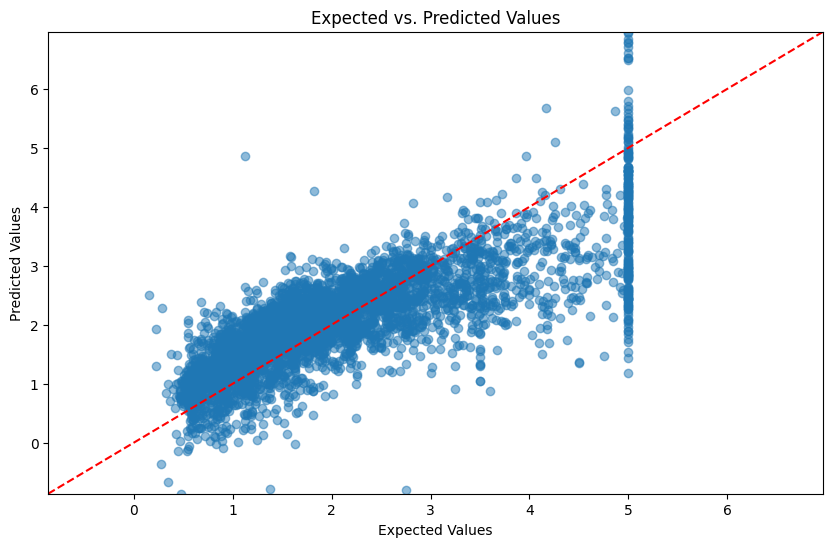

In [46]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Expected'], df['Predicted'], alpha=0.5)
plt.title('Expected vs. Predicted Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')

# Set the x- and y-axes limits to use the same scale along both axes
start = min(df['Expected'].min(), df['Predicted'].min())
end = max(df['Expected'].max(), df['Predicted'].max())
plt.xlim(start, end)
plt.ylim(start, end)

# Add a diagonal line for reference
plt.plot([start, end], [start, end], color='red', linestyle='--')

plt.show()


In [47]:
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for testing set
RMSE is 0.7360378574346162


RMSE (Root Mean Squared Error) of 0.736 indicates that, on average, the model's predictions are off by about 0.736 units from the actual values.

In [48]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_test_predicted)
print(f'MAE: {mae}')


MAE: 0.5389572480554756


In [49]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_predicted)
print(f'R²: {r2}')


R²: 0.6075794091011186


**CONCLUSION**
This predictive analyses model with linear regression using California housing dataset. The feature and target models were used for this analysis. The outcome showed that, the predicted values and the expected values explains most of the model performace being very good with a Root Mean Squared Error) of 0.736, indicating thee predictions are 73% accurate to the actual value.

# **QUESTION TWO**


# K-NEAREST NEIGHBORS ANALYSIS (kNN)
This is an analysis where the majority class label determines the class label of a new data point among its K nearest neighbors.

* This analysis is to load the digits data using scikit-learn model. 
* Build a KNN Analysis predictive model by using the digit dataset, the data is then split into training and testing data.
* A cross validation technique to evaluate the performance of a model


In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [51]:
# Load the digits dataset
digits = datasets.load_digits()

# Display dataset information
print("Dataset Size:", digits.data.shape)
print("Target Size:", digits.target.shape)


Dataset Size: (1797, 64)
Target Size: (1797,)


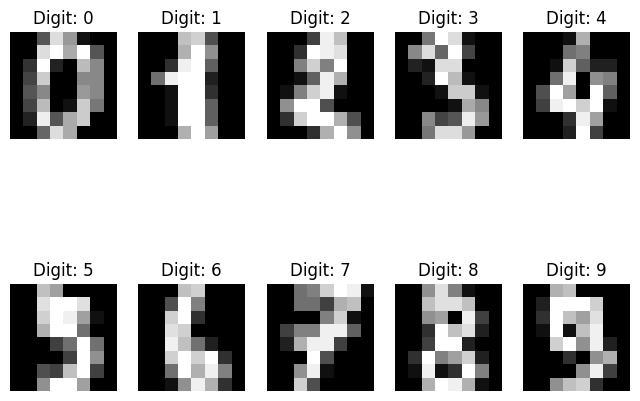

In [52]:
# Visualizing some of the digits in the dataset
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.show()


## Machine Learning
#### Splitting and Training the dataset


In [53]:
# Split the data into training and testing sets
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)


Training Set Size: (1437, 64)
Test Set Size: (360, 64)



#### Training and testing the model

In [54]:
# Instantiate the k-NN classifier with 5 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN classifier
knn.fit(X_train, y_train)


KNeighborsClassifier()

<div class="alert alert-block alert-success">

### PREDICTING THE MODEL

</div>

In [55]:
# Predict on the test set
y_predict = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.61%


In [56]:
y_predict

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [57]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predict))

# Display a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predict))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]


The model has an accuracy of 98.61%, which is high. This indicates  the model correctly predicted around 98.61% of the test instances.

* Classification Report: 

The report provides *precision*, *recall*, and *F1-score* for each class (from 0 to 9).
Precision, recall, and F1-score are very high for all classes (mostly 0.97 to 1.00).
The *support* column indicates the number of actual instances of each class in y_test.
The *macro avg* and *weighted avg* rows show the average metrics across all classes. Both are close to 0.99, indicating consistent performance across classes.

* Confusion Matrix:

The matrix shows the number of correct and incorrect predictions per class.
Diagonal values for example: 33, 28, 33, etc. represent correct predictions, while off-diagonal values represent misclassifications.
Very few off-diagonal values are non-zero, which indicates that the model made only a few mistakes.
Overall, the metrics indicate a highly accurate model with balanced performance across all classes.

1. The **accuracy_score** function from the sklearn.metrics module is used to calculate the accuracy of the classifier, which is the proportion of correctly classified instances. In this case, the model has an accuracy of 0.9861, meaning it correctly classified 98.61% of instances.
2. The **precision_score** function is used to calculate the precision of the classifier, which is the proportion of true positives (correctly classified positive instances) out of all instances classified as positive. In this case, the model has a precision of 0985, meaning985% of positive predictions were actually true positives.
3. The **recall_score** function is used to calculate the recall of the classifier, which is the proportion of true positives out of all actual positive instances. In this case, the model has a recall of 1.0, meaning it correctly identified all positive instances.

### VISUALIZE THE PREDICTIONS

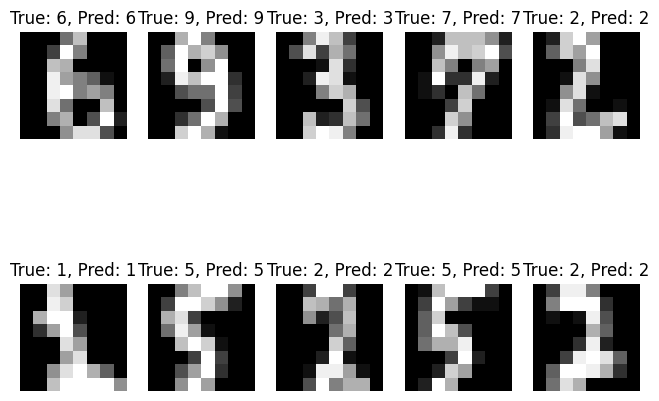

In [58]:
# Visualize some of the test set predictions
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {y_predict[i]}')
    plt.axis('off')
plt.show()


Each subplot displays a digit image with its true label and the model's predicted label, ranging from 1,2,3,5,6,7, and 9
In the image above, it appears that the model correctly predicted each digit, as all True and Predicted values match.

<div class="alert alert-block alert-success">

### OPTIMIZING THE VALUE OF K

</div>

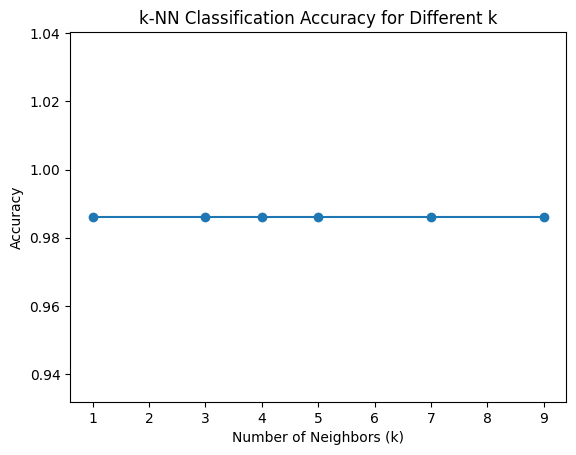

In [70]:
# Try different values of k and observe the accuracy
neighbors = [1, 3, 4, 5, 7, 9]
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_predict))

# Plot the accuracy for different values of k
plt.figure()
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Classification Accuracy for Different k')
plt.show()


The plot visualizes the classification accuracy for different values of k. The accuracy remains constant at approximately 0.97 for all tested k values of 1, 3, 4, 5, 7, 9. This consistency indicates that the k-NN classifier performs reliably across these different values of k.


#### CROSS VALIDATION
Cross-validation is a technique to evaluate the performance of a model by splitting the data into multiple subsets and ensuring that each part of the data is used for training and testing


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neighbors = range(1, 10)  # Range of k values you want to test
cv_scores = []  # List to store the average cross-validation scores for each k

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation and compute the mean accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


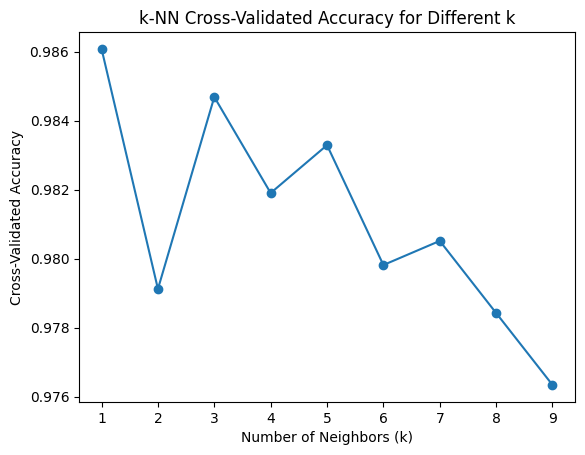

In [61]:
plt.plot(neighbors, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Cross-Validated Accuracy for Different k')
plt.show()

In [62]:
# Defining the parameter grid
param_grid = {'n_neighbors': range(1, 10)}

# Setting up the GridSearch with cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print out the best parameter and score
print("Best k:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)


Best k: {'n_neighbors': 1}
Best cross-validated accuracy: 0.9860820751064654
